# Exercise 06

## Some Information about the Evacuation Model

* Agents have a field of vision oriented towards their direction of movement (NORTH, EAST, SOUTH, WEST). Within the field of vision they learn about exits and other humans.

 ![Vision](./resources/FireEvacuation_Refactored_Vision.png) 

* If agents do not see an exit in their field of vision they turn clockwise.
* Agents can cooperate based on their cooperativeness with humans in their field of vision. They choose the nearest visible human that either has speed zero, does not believe in alarm, or does not yet know about any exit. The active agent then tries to reach the agent and
  * makes it believe in alarms
  * exchange information about exits the agent knows
  * sets the speed to 1
* When nervous, agents either accelerate or slow down
* Introduction of crowds anxiety: When the proportion of agents in the neighbourhood exceeds a threshold, the nervousness increases
* Panic random walk: With certain probability during high nervousness, walk in a random direction

## Evaluation Code


In [23]:
from mesa.batchrunner import batch_run
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

import sys
sys.path.insert(0,'../../abmodel')


from fire_evacuation.model import FireEvacuation
from fire_evacuation.agent import Human

In [24]:
uniks = LinearSegmentedColormap.from_list( 'unik', [np.array((80,149,200))/255, np.array((74,172,150))/255,
                                                  np.array((234,195,114))/255, np.array((199,16,92))/255])

def draw_grid(model, ax=None, focus=None):
    """
    Draw the current state of the grid
    """
    if not ax:
        fig, ax = plt.subplots(figsize=(6, 6))

    
    if focus == None:
        focus = (model.grid.width, model.grid.height)

    grid = np.zeros((focus[0], focus[1]))
    for agents, (x, y) in model.grid.coord_iter():
        if x < focus[0] and y < focus[1]:
            for agent in agents:
                if isinstance(agent, Human):    
                    grid[x][y] = 1
                    continue
                
    ax.pcolormesh(grid, cmap=uniks, vmin=0, vmax=1)
    ax.axis("off")
    ax.set_title("Steps: {}".format(model.schedule.steps))

In [25]:
def run_model(model, steps = [2,2,2,2,2], focus = None):
    """
    Run an experiment with a given model, and plot the results.
    """
    fig = plt.figure(figsize=(12, 5))

    for i in range(0, len(steps)):
        draw_grid(model, fig.add_subplot(2, len(steps) + 1, i + 1 ), focus=focus)
        model.run(steps[i])
        
    draw_grid(model, fig.add_subplot(2, len(steps) + 1, i + 2 ), focus=focus)
    
    ax = fig.add_subplot(2, 1, 2)

    d = model.datacollector.get_model_vars_dataframe()
    d = d * 100 / model.schedule.get_agent_count()
    d.plot(ax=ax, colormap=uniks)

# Task 2 (Adaptation in the evacuation model)

## Subtask 2.2

Place you table here or as separate spreadsheet file

## Subtask 2.3

Extend the model code to count decision, restart the kernel (Menu > Kernel > Restart Kernel and Run All Cells), and inspect results.

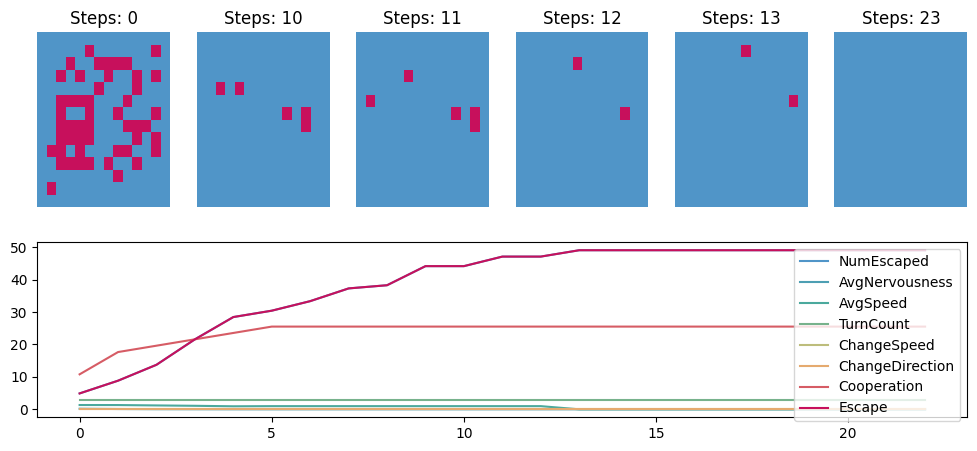

In [26]:
evacuation = FireEvacuation(floor_size = 12,
        human_count = 50,
        alarm_believers_prop = 1.0,
        max_speed = 3,
        cooperation_mean = 0.3,
        nervousness_mean = 0.3,
        seed = 1)
run_model(evacuation, steps = [10,1,1,1,10])

In [27]:
# implement batch runs here
coop_vals = np.arange(0.1,0.7,0.1)
params = dict(
    floor_size = 12,
    human_count = 50,
    alarm_believers_prop = 1.0,
    max_speed = 3,
    nervousness_mean = 0.3,
    seed = 1,
    cooperation_mean = coop_vals
)

# uncomment to run the model, since it takes a long time (never finishes) otherwise 
#with io.capture_output() as captured:
#    show_logs("FireEvacuation")
results = batch_run(
    FireEvacuation,
    parameters=params,
    iterations=7,
    max_steps=100,
    number_processes=1,
    data_collection_period=1,
    display_progress=True,
)
#    freeze_logs("FireEvacuation")

  0%|          | 0/42 [00:00<?, ?it/s]

In [28]:
# normal results, not processed
results_df = pd.DataFrame(results)
display(results_df)

,RunId,iteration,Step,floor_size,human_count,alarm_believers_prop,max_speed,nervousness_mean,seed,cooperation_mean,NumEscaped,AvgNervousness,AvgSpeed,TurnCount,ChangeSpeed,ChangeDirection,Cooperation,Escape
0,0,0,0,12,50,1.0,3,0.3,1,0.1,3,0.152179,1.531915,11,0,0,14,3
1,0,0,1,12,50,1.0,3,0.3,1,0.1,12,0.052769,1.421053,11,0,0,21,12
2,0,0,2,12,50,1.0,3,0.3,1,0.1,18,0.019342,1.312500,11,0,0,25,18
3,0,0,3,12,50,1.0,3,0.3,1,0.1,27,0.003235,1.086957,11,0,0,27,27
4,0,0,4,12,50,1.0,3,0.3,1,0.1,30,0.000000,1.050000,11,0,0,28,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,41,6,18,12,50,1.0,3,0.3,1,0.6,49,0.000000,1.000000,10,0,0,32,49
824,41,6,19,12,50,1.0,3,0.3,1,0.6,49,0.000000,1.000000,10,0,0,32,49
825,41,6,20,12,50,1.0,3,0.3,1,0.6,49,0.000000,1.000000,10,0,0,32,49
826,41,6,21,12,50,1.0,3,0.3,1,0.6,49,0.000000,1.000000,10,0,0,32,49


In [29]:
decision_counts = ['TurnCount', 'ChangeSpeed', 'ChangeDirection', 'Cooperation', 'Escape']

In [30]:
# keep relevant features
reduced_df = results_df[['RunId', 'iteration', 'Step', 'cooperation_mean', *decision_counts]]
reduced_df

,RunId,iteration,Step,cooperation_mean,TurnCount,ChangeSpeed,ChangeDirection,Cooperation,Escape
0,0,0,0,0.1,11,0,0,14,3
1,0,0,1,0.1,11,0,0,21,12
2,0,0,2,0.1,11,0,0,25,18
3,0,0,3,0.1,11,0,0,27,27
4,0,0,4,0.1,11,0,0,28,30
...,...,...,...,...,...,...,...,...,...
823,41,6,18,0.6,10,0,0,32,49
824,41,6,19,0.6,10,0,0,32,49
825,41,6,20,0.6,10,0,0,32,49
826,41,6,21,0.6,10,0,0,32,49


In [31]:
# get only one value per cooperation mean and step
avg_df = reduced_df.groupby(['Step', 'cooperation_mean']).mean()
avg_df.drop(columns=['iteration', 'RunId'], inplace=True)
avg_df.reset_index(inplace=True)
avg_df

,Step,cooperation_mean,TurnCount,ChangeSpeed,ChangeDirection,Cooperation,Escape
0,0,0.1,11.0,0.0,0.0,14.0,3.000000
1,0,0.2,8.0,0.0,0.0,12.0,3.000000
2,0,0.3,3.0,0.0,0.0,11.0,5.000000
3,0,0.4,10.0,0.0,0.0,13.0,2.000000
4,0,0.5,7.0,1.0,0.0,15.0,2.000000
...,...,...,...,...,...,...,...
120,22,0.6,10.0,0.0,0.0,32.0,50.000000
121,23,0.2,8.0,0.0,0.0,30.0,49.000000
122,24,0.2,8.0,0.0,0.0,30.0,49.000000
123,25,0.2,8.0,0.0,0.0,30.0,49.666667


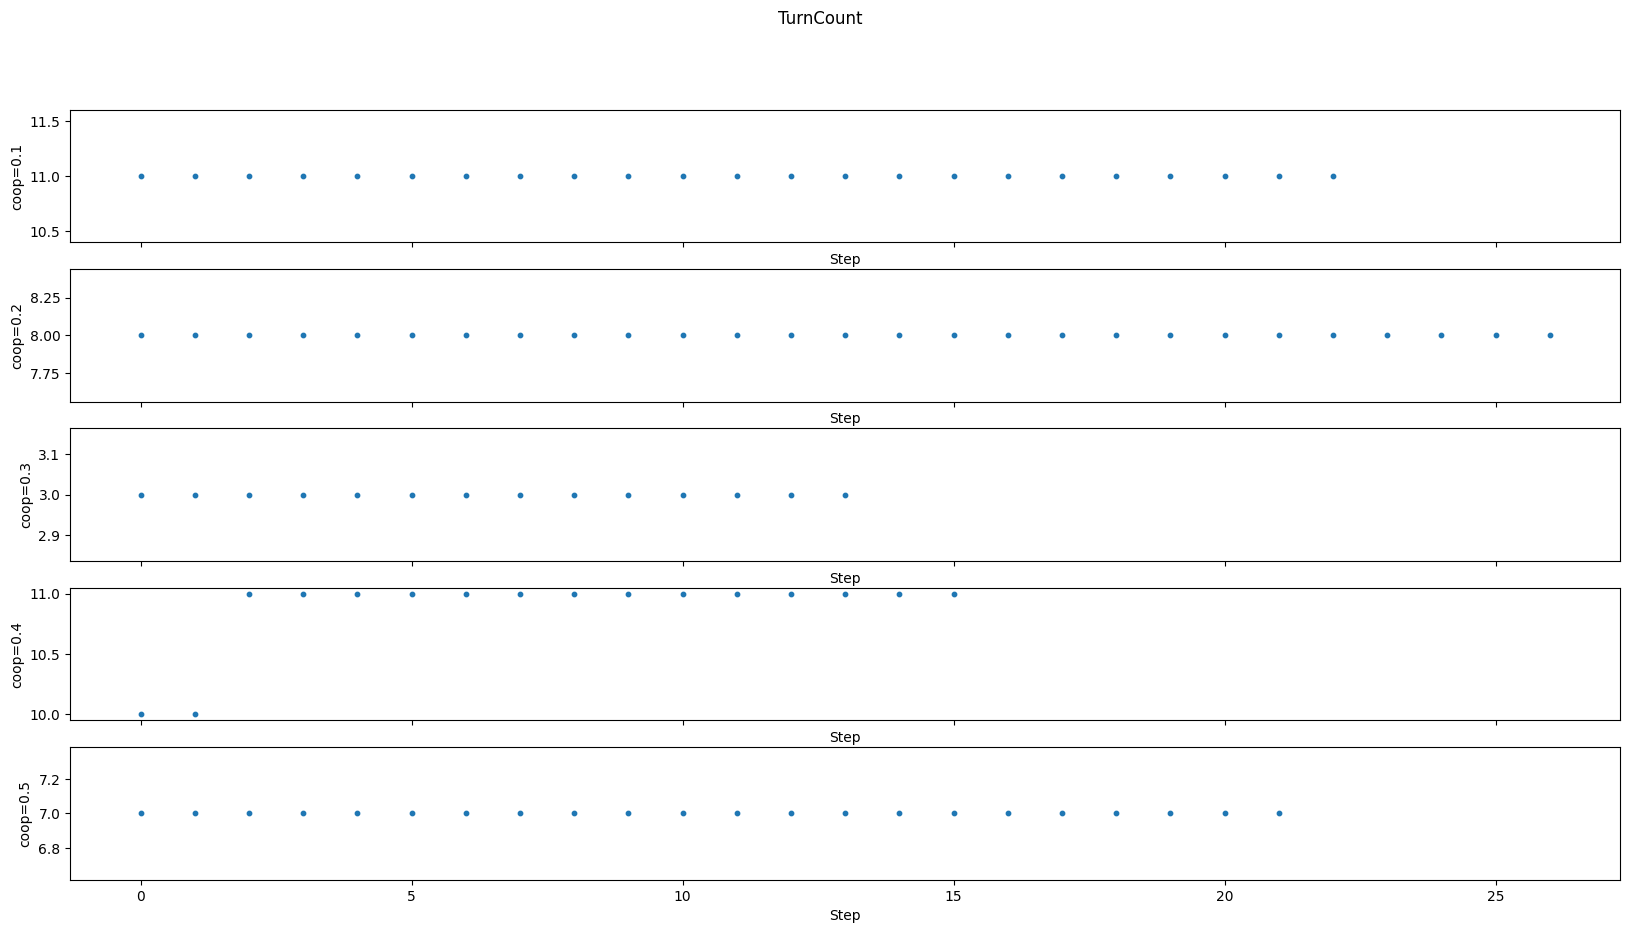

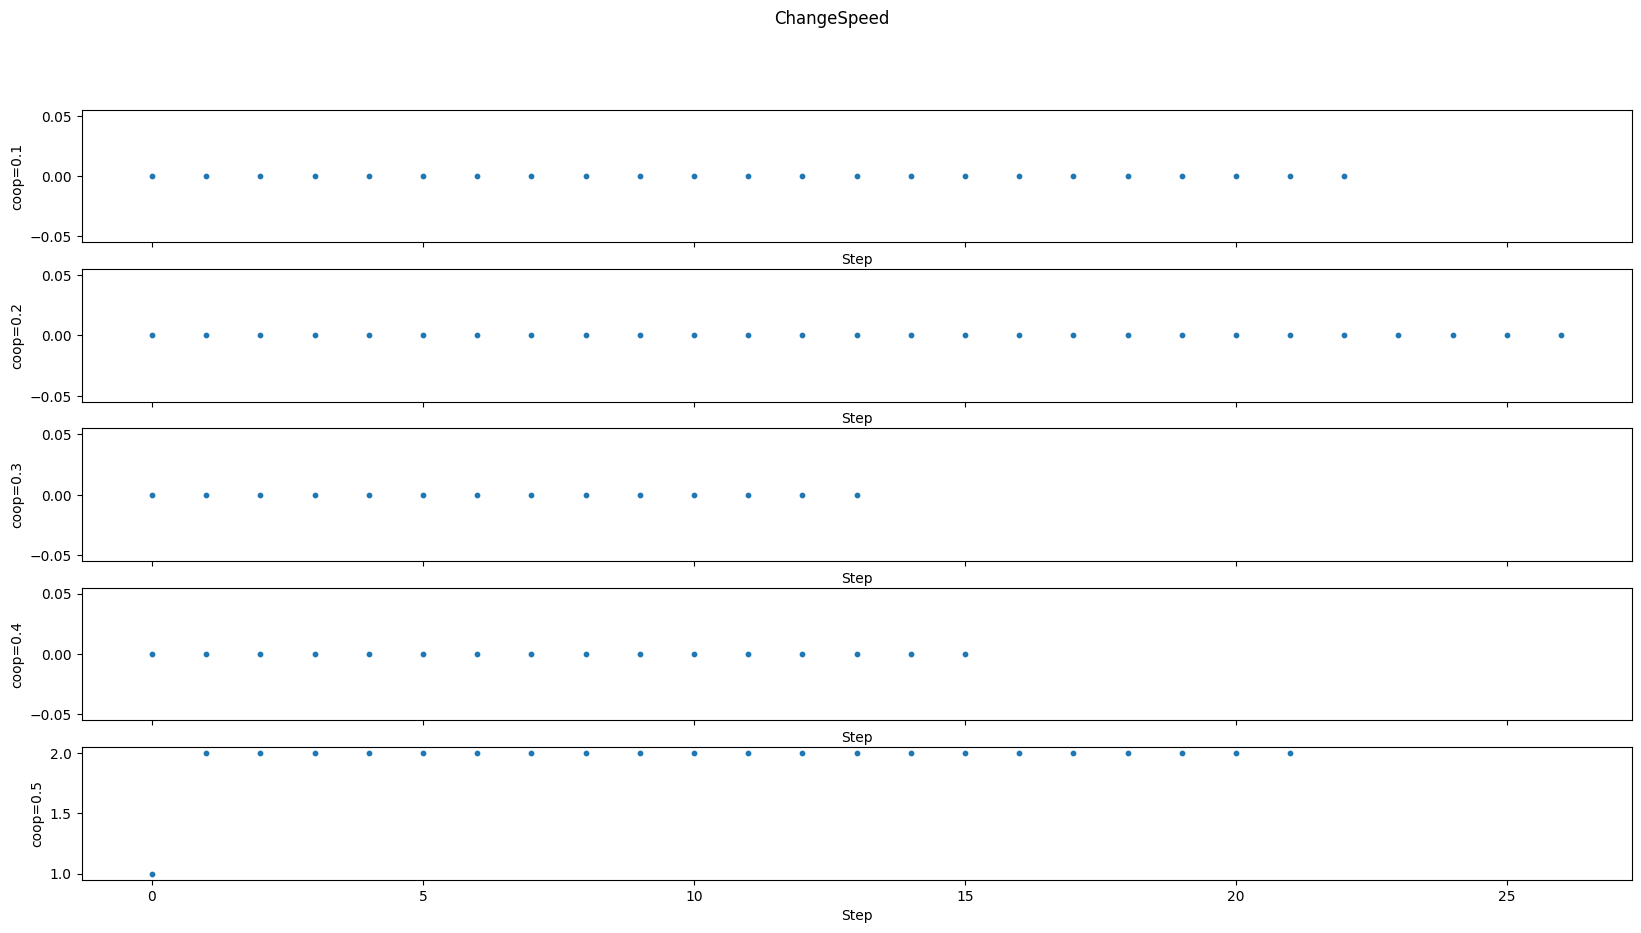

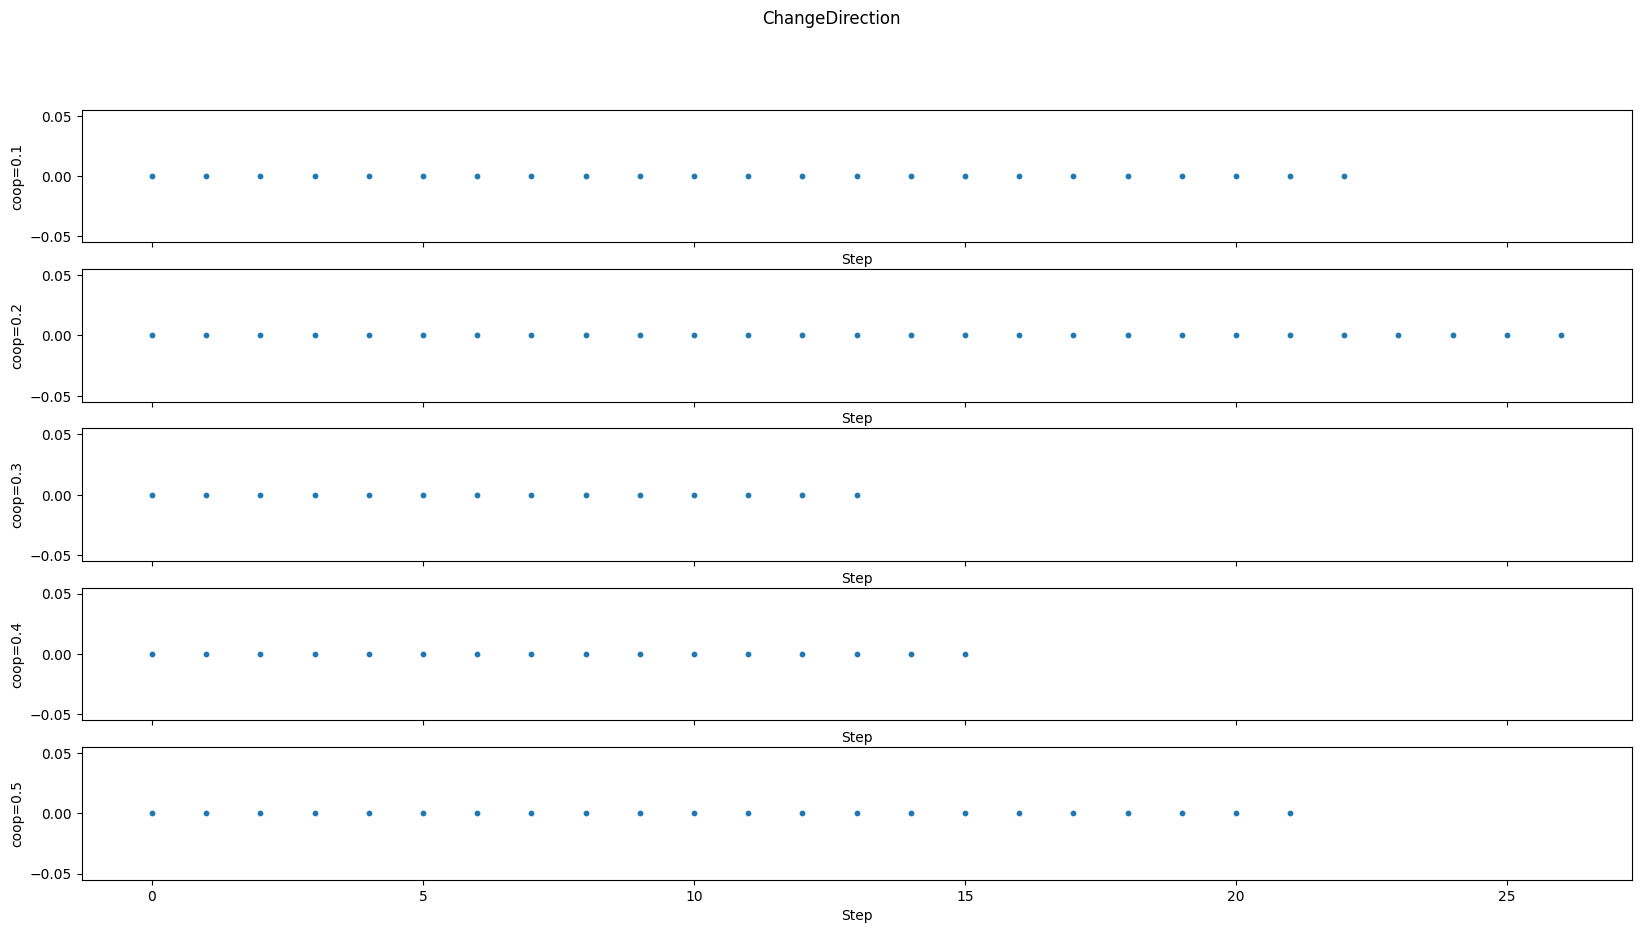

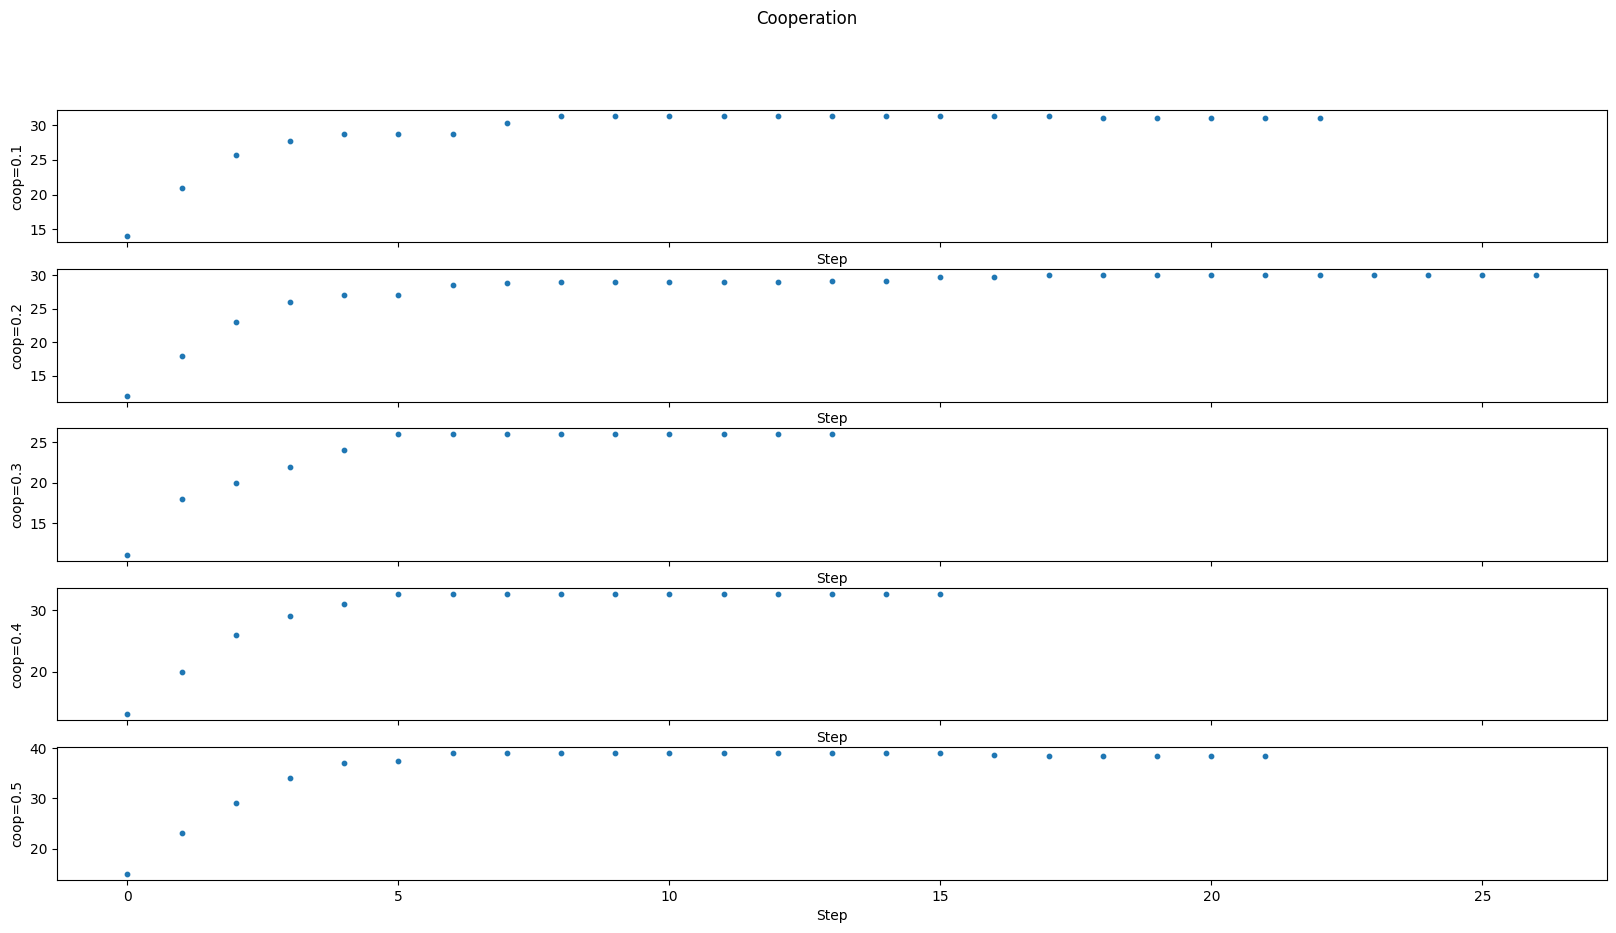

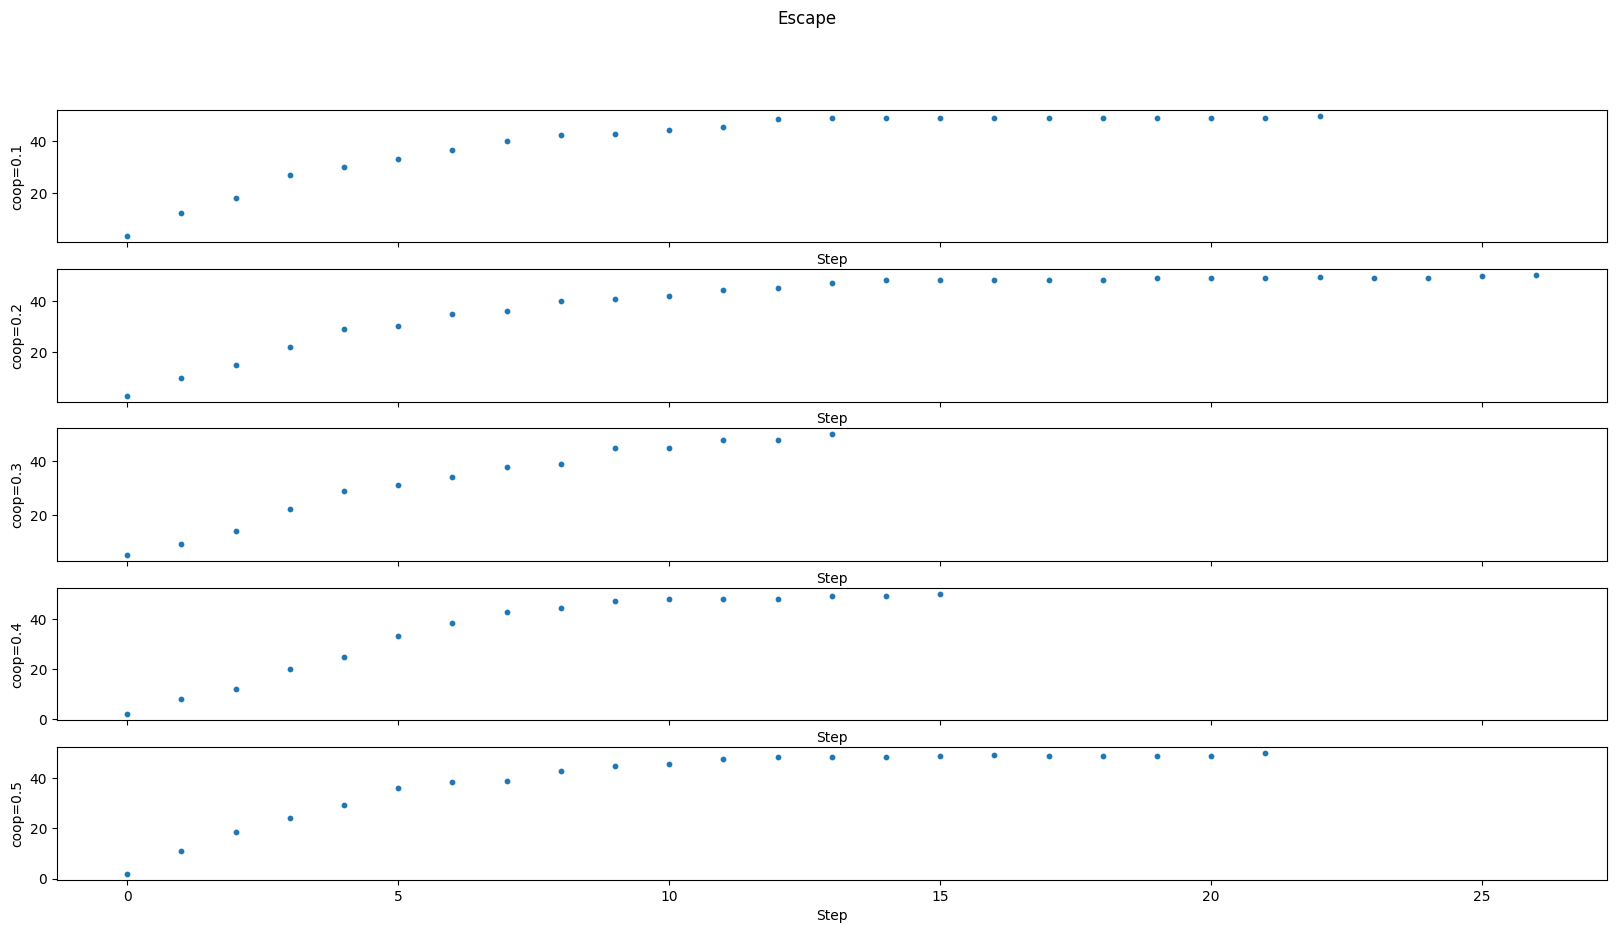

In [32]:
# display results
for region in decision_counts:
    fig,(ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, figsize=(20,10), sharex=True)
    fig.suptitle(region)
    for coop_value, ax in zip(coop_vals, [ax1, ax2, ax3, ax4, ax5]):
        df = avg_df.loc[avg_df['cooperation_mean'] == coop_value]
        ax.scatter(df['Step'], df[region], s=10)
        ax.set(xlabel='Step', ylabel=f'coop={round(coop_value, 2)}')
       
    plt.show()

# Findings
## Turn Count
The turn count is increased if an agent finsihes its turn.
The numbers are lower and more static than expected. TODO

## Change Speed
The change speed means that an agents changed its speed due to high nervousness in a random fashion.
Opposed to my hypothesis, this happened only for the highest cooperation_mean value.
However, the number of agents that have done this is really low.

## Change Direction
The change direction means that an agents changed its direction due to high nervousness in a random direction.
This counter does not seem to work. TODO


## Cooperation
The decision to cooperate means, that an agent cooperated with another one.
The value range (i.e. y-axis) is the same for all runs.
However, one may notice, that for the higher values of cooperation_mean the maximal values are reached faster (which is logical).

## Escape
The 'decision to escape' means that the agent escaped. 
Hence, this plot visualizes the number of escaped agents over time.
The overall shape of the curve stays roughly the same.
However, for cooperation_mean >= 0.3, the higher cooperation_mean gets the faster all agents escape (i.e. fewer steps are necessary).
Looking closely, one finds little (almost) plateaus/ less steep slope for every cooperation_mean option (e.g. coop=01: step 3-5). 
The region of less steep slope is a little bit different for each cooperation_mean.
It is strange, that the escape takes longer for cooperation_mean of 0.3 than those smaller than 0.3.

# Task 3 (Exploring the interplay of different objectives in the evacuation model)

## Subtask 3.1

**List the measures suitable to quantify success for each of the two selected objectives here!**
## Escape_Myself
In order to quantify the utility towards escaping myself (as a single agent), one can save the number of steps necessary until the agent escapes (i.e. its position is equal to the key of the fire exit and the agent is removed from the grid).
One could compare the individual number of steps to the overall time used to evacuate all agents afterwards to evaluate the result.
During simulation, the agent should try to escape by getting help by others or as soon as knowing the postion of the fire exit being selfish and no longer cooperate with any other agent.

## Avoid_Crowd
In order to quantify the utility towards avoiding the crowd, one could calculate the portion of agents in 'my' (an agent's) field of vision from the total number of agents.
The agent should minimize this number.
Hence, escaping might be of secondary interest.

## Subtask 3.2

**objective funtion:**
Objective function for <Escape_Myself>
    
$$u_{avoid\_crowd}^i = \sum_{j \in field\_of\_vision; j \neq i}dist(i,j)$$
$$u_{escape}^i = \sum_{k}^{step}\delta(i, k)$$
$$u_{total}^i = (1-\lambda_{e}) * u_{avoid\_crowd}^i + \lambda_{e} * u_{escape}^i $$

-> Goal: minimize $u_{total}$. 
One can decide whether the focus is on escaping (since the agent can avoid crowds better if he/she is outside the room/grid in theory), or on avoiding crowds.
The preference can be set by choosing a $\lambda_{e}$.
The closer another agent is to our agent $i$ the more 'punishment' is added to the sum.
    
### Meaning of symbols
 * $i$ agent
 * $j$ is an iterator over other agents
 * $k$ is an iterator over time/steps
 * $dist(i,j)$ distance between agent i and agent j
 * $\delta(i, k)$ is equal to one if agent i is not escaped at step k, zero else
 * $\lambda_{e} \in [0,1]$ is the priority factor of escaping. Note that $1 - \lambda_{e}$ is the denoted the priority factor of avoiding the crowd. 
 * $u$ utility    

# Task 4 (Extend adaptation in the evacuation model)

## Subtask 4.1

**Describe your concept to improve *turn()* and the relevant agent properties here (bullet points)!**
- turn currently just turns around clockwise irrespective of knowledge from field of vision
- improve turn by turning to the direction where
    - fewest known neighbours (we know equally much about left and right from the field of vision and even if its less than we know about the current direction that is blocked, the situation might improved)
    -> The decision is a little bit more informed
    
    Possible future improvements to make it more realistic:
    1. only allow to turn left or right normally using informed method
    2. turn to second best option if there is a direct neighbour (otherwise stuck again immediately)
    3. if left and right is crowed beyond a certain threshold, turn backwards


## Subtask 4.2

Implement your improvements to the *turn()* method.

## Subtask 4.3

Restart the kernel to apply your changes in *abmodel/fire_evacuation/agent.py*

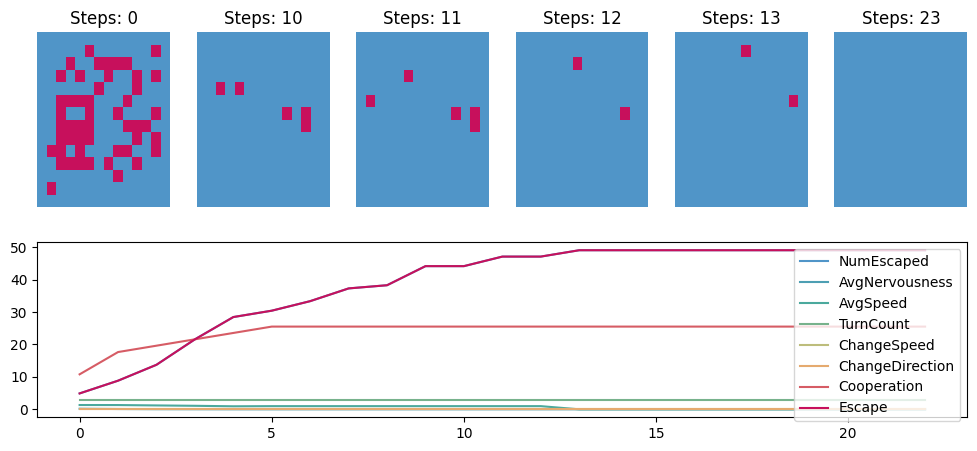

In [33]:
evacuation = FireEvacuation(floor_size = 12,
        human_count = 50,
        alarm_believers_prop = 1.0,
        max_speed = 3,
        cooperation_mean = 0.3,
        nervousness_mean = 0.3,
        seed = 1)
run_model(evacuation, steps = [10,1,1,1,10])

# Findings
I have saved both plots under resources directory.
The cooperation looks a little bit smoother with the old version of the turn method.
The pink spots (agents) need longer to evacute with the old version of the turn method.
The Turn Count seems to stay the same.
The average speed looks a little bit smoother with the old version of the turn method.
Other than that the plots look the same (especially the turn count).